Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158909 entries, 0 to 158908
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               158870 non-null  object 
 1   Artist              157644 non-null  object 
 2   ConstituentID       157644 non-null  object 
 3   ArtistBio           152172 non-null  object 
 4   Nationality         157644 non-null  object 
 5   BeginDate           157644 non-null  object 
 6   EndDate             157644 non-null  object 
 7   Gender              157644 non-null  object 
 8   Date                156889 non-null  object 
 9   Medium              149606 non-null  object 
 10  Dimensions          150275 non-null  object 
 11  CreditLine          157380 non-null  object 
 12  AccessionNumber     158909 non-null  object 
 13  Classification      158908 non-null  object 
 14  Department          158909 non-null  object 
 15  DateAcquired        

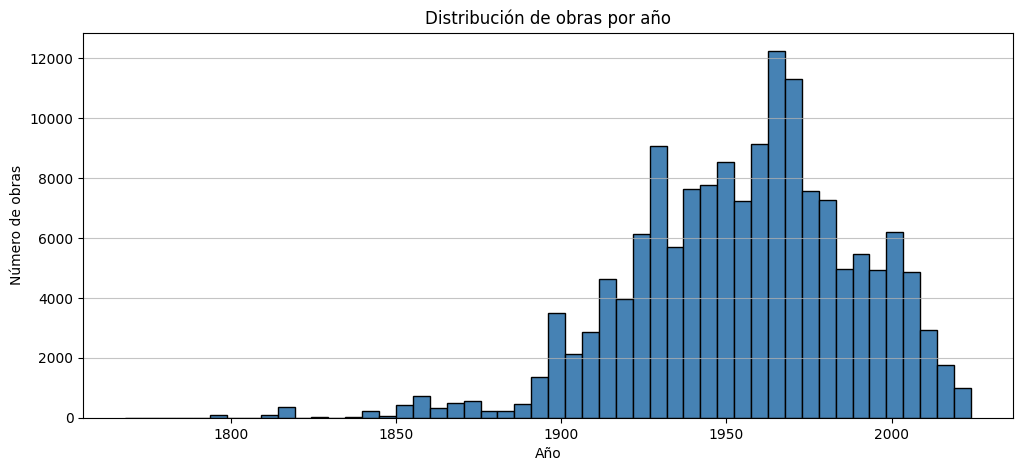

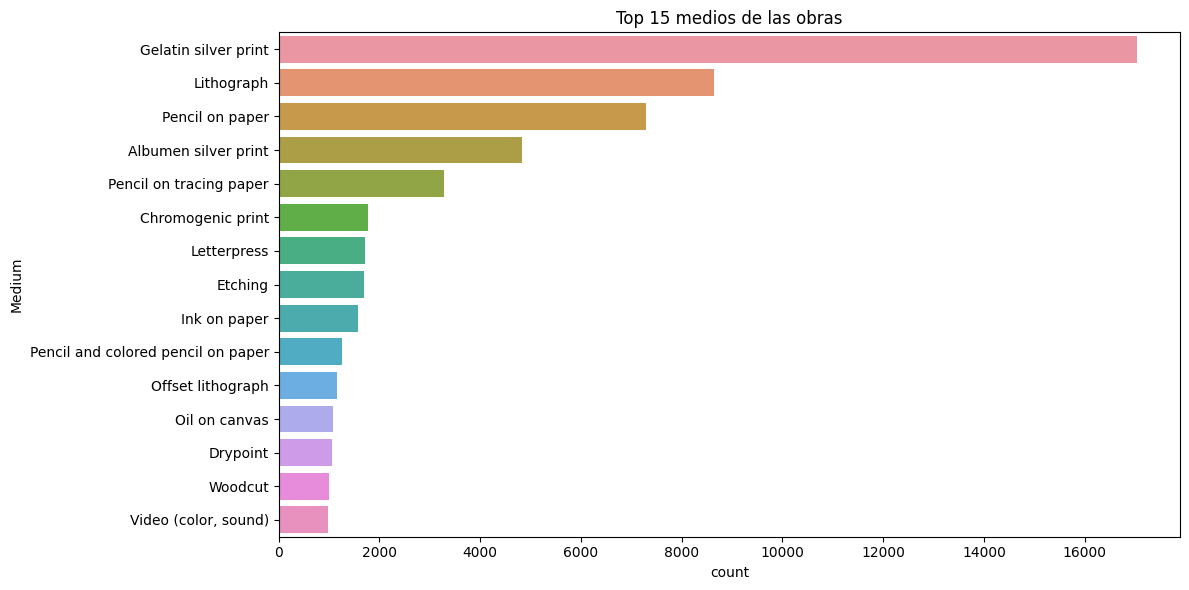

In [2]:
# 01_EDA_artworks.ipynb

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Para poder importar módulos desde la carpeta src si usas estructura modular
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import src.data_loader as dl  # si tienes un loader definido

# --- Carga datos ---
artworks = dl.load_artworks()  # o pd.read_csv("../data/artworks.csv")

# --- Función segura para extraer año de la columna 'Date' ---
def extract_year(value):
    if pd.isna(value):
        return pd.NA
    # Buscar el primer año de 4 dígitos en la cadena
    match = re.search(r"(\d{4})", str(value))
    if match:
        return int(match.group(1))
    else:
        return pd.NA

# --- Limpieza ---
artworks['Year'] = artworks['Date'].apply(extract_year)

# --- Información general ---
print("Info general:")
print(artworks.info())

print("\nPrimeras filas:")
print(artworks.head())

# --- Estadísticas básicas ---
print("\nDescripción numérica:")
print(artworks.describe())

# --- Conteo valores nulos ---
print("\nValores nulos por columna:")
print(artworks.isna().sum())

# --- Conteo valores únicos en columnas importantes ---
for col in ["Medium", "ArtistNationality", "Classification", "DateAcquired"]:
    if col in artworks.columns:
        print(f"\nValores únicos en {col}:")
        print(artworks[col].value_counts(dropna=False).head(10))

# --- Distribución temporal (usando 'Year') ---
plt.figure(figsize=(12, 5))
artworks['Year'].dropna().astype(int).plot.hist(bins=50, color='steelblue', edgecolor='black')
plt.title("Distribución de obras por año")
plt.xlabel("Año")
plt.ylabel("Número de obras")
plt.grid(axis='y', alpha=0.75)
plt.show()

# --- Obras por técnica / medio ---
if "Medium" in artworks.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y="Medium", data=artworks, order=artworks["Medium"].value_counts().index[:15])
    plt.title("Top 15 medios de las obras")
    plt.tight_layout()
    plt.show()

# --- Obras por nacionalidad del artista ---
if "ArtistNationality" in artworks.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y="ArtistNationality", data=artworks, order=artworks["ArtistNationality"].value_counts().index[:15])
    plt.title("Top 15 nacionalidades de artistas")
    plt.tight_layout()
    plt.show()
